# Linear Regression (Weight Prediction based on Height)

In [ ]:
import pandas as pd # importing pandas library
import numpy as np  # importing numpy library
from matplotlib import pyplot as plt # importing pyplot from matplotlib

import warnings as wr # importing warning library
wr.filterwarnings('ignore') # to ignore all warning messages

In [2]:
!pip install gspread #installing gspread

In [9]:
import gspread # importing gspread
gc = gspread.service_account(filename = '/Users/mdabarik/Downloads/TrashBox/aiquestbatch15-77f4c665d393.json') # authentication set up 

In [11]:
sheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1TLrvuueeF0YVtLDvnRFByYm5UY-RJ85E9n-Tj2Ll45k/edit?usp=sharing') # accessing google docs
ws = sheet.worksheet(title = 'Height-Weight Data') # the value stored as a matrix

In [39]:
df = pd.DataFrame(ws.get_all_records()) # transforming data into data frame

In [40]:
print(df) # printing dataset

         Height      Weight
0     73.847017  241.893563
1     68.781904  162.310473
2     74.110105  212.740856
3     71.730978  220.042470
4     69.881796  206.349801
...         ...         ...
3496  69.296830  185.649086
3497  70.542201  210.198845
3498  73.912549  202.429960
3499  67.396021  144.277671
3500  72.738970  187.222909

[3501 rows x 2 columns]


In [41]:
df.shape # viewing (rows, cols)

(3501, 2)

In [45]:
x = df.drop('Height', axis=1) # dropping column 'Height', (axis=1, means column, axis=2, means row)
y = df[['Height']] # selecting column 'Weight'

In [47]:
from sklearn.model_selection import train_test_split # import train_test_split to split data

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.80, random_state = 1) 
# spliting data by keeping training data 80% and testing data 20% with a same shuffle random_state 1

In [64]:
xtrain, ytrain

(          Weight
 2342  176.413501
 113   178.685546
 245   156.869952
 1439  204.358875
 1022  189.595960
 ...          ...
 2763  186.208566
 905   175.093255
 1096  224.440459
 235   198.460249
 1061  192.307027
 
 [700 rows x 1 columns],
          Height
 2342  68.360072
 113   69.196858
 245   65.498995
 1439  68.356165
 1022  70.079323
 ...         ...
 2763  68.457061
 905   66.539812
 1096  75.999957
 235   70.555244
 1061  70.269360
 
 [700 rows x 1 columns])

# Linear Regression using SKLearn Library

In [53]:
from sklearn.linear_model import LinearRegression # importing Linear Regression from sklearn

In [54]:
model = LinearRegression() # empty model
model.fit(xtrain, ytrain) # fitting the model, it will find slope & intercept for best fit line.

LinearRegression()

In [66]:
prediction = model.predict(xtest) # predicting on test dataset
print(prediction) # printing prediction data

[[69.72147233]
 [69.08661187]
 [69.58556201]
 ...
 [68.52252869]
 [69.37294643]
 [71.25998959]]


In [67]:
model.score(xtest, ytest) # accuracy of our model

0.7316652424571117

Text(0, 0.5, 'Height')

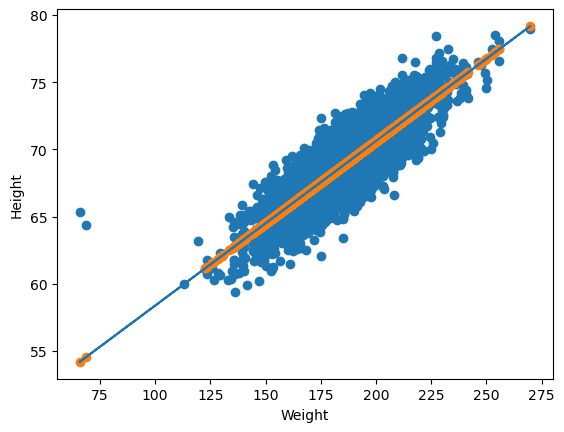

In [69]:
plt.scatter(df['Weight'], df['Height']) # plotting original dataset
plt.scatter(xtest, prediction) # prediction against our test dataset
plt.plot(xtest, prediction) # plotting our best fit line
plt.xlabel('Weight')
plt.ylabel('Height')

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [76]:
MSE = mean_squared_error(xtest, prediction)
MAE = mean_absolute_error(xtest, prediction)

In [77]:
MSE, MAE

(14212.58718594339, 117.91107214214911)